In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv("sample_train.csv", parse_dates = ['pickup_datetime']).drop(columns = 'key')

pd.set_option('display.max_columns', None) # inorder to axcess all the columns we need to set the max columns to none
pd.set_option('display.float_format', lambda x: '%.3f' % x)

plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
train.head(20)

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.500,2015-05-07 19:52:06+00:00,-74.000,40.738,-74.000,40.723,1
1,27835199,7.700,2009-07-17 20:04:56+00:00,-73.994,40.728,-73.995,40.750,1
2,44984355,12.900,2009-08-24 21:45:00+00:00,-74.005,40.741,-73.963,40.773,1
3,25894730,5.300,2009-06-26 08:22:21+00:00,-73.976,40.791,-73.965,40.803,3
4,17610152,16.000,2014-08-28 17:47:00+00:00,-73.925,40.744,-73.973,40.761,5
5,44470845,4.900,2011-02-12 02:27:09+00:00,-73.969,40.756,-73.969,40.756,1
6,48725865,24.500,2014-10-12 07:04:00+00:00,-73.961,40.694,-73.871,40.774,5
7,44195482,2.500,2012-12-11 13:52:00+00:00,0.000,0.000,0.000,0.000,1
8,15822268,9.700,2012-02-17 09:32:00+00:00,-73.975,40.746,-74.003,40.744,1
9,50611056,12.500,2012-03-29 19:06:00+00:00,-74.001,40.742,-73.963,40.775,1


In [3]:
train.shape

(200000, 8)

In [4]:
train.rename(columns = {'Unnamed: 0':"ID"},inplace = True)


In [5]:
train.dtypes

ID                                 int64
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [6]:
train.head(20)

,ID,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.500,2015-05-07 19:52:06+00:00,-74.000,40.738,-74.000,40.723,1
1,27835199,7.700,2009-07-17 20:04:56+00:00,-73.994,40.728,-73.995,40.750,1
2,44984355,12.900,2009-08-24 21:45:00+00:00,-74.005,40.741,-73.963,40.773,1
3,25894730,5.300,2009-06-26 08:22:21+00:00,-73.976,40.791,-73.965,40.803,3
4,17610152,16.000,2014-08-28 17:47:00+00:00,-73.925,40.744,-73.973,40.761,5
5,44470845,4.900,2011-02-12 02:27:09+00:00,-73.969,40.756,-73.969,40.756,1
6,48725865,24.500,2014-10-12 07:04:00+00:00,-73.961,40.694,-73.871,40.774,5
7,44195482,2.500,2012-12-11 13:52:00+00:00,0.000,0.000,0.000,0.000,1
8,15822268,9.700,2012-02-17 09:32:00+00:00,-73.975,40.746,-74.003,40.744,1
9,50611056,12.500,2012-03-29 19:06:00+00:00,-74.001,40.742,-73.963,40.775,1


In [7]:
train.isnull().sum().sort_values(ascending = False)

dropoff_latitude     1
dropoff_longitude    1
passenger_count      0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
ID                   0
dtype: int64

In [8]:
#train = train.drop(train[train.isnull().any(1)].index, axis = 0)

# Data analysis:


In [9]:
train.describe(include = "all")

,ID,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000,200000.000,200000,200000.000,200000.000,199999.000,199999.000,200000.000
unique,nan,nan,196629,nan,nan,nan,nan,nan
top,nan,nan,2009-02-12 12:46:00+00:00,nan,nan,nan,nan,nan
freq,nan,nan,4,nan,nan,nan,nan,nan
first,nan,nan,2009-01-01 01:15:22+00:00,nan,nan,nan,nan,nan
last,nan,nan,2015-06-30 23:40:39+00:00,nan,nan,nan,nan,nan
mean,27712503.682,11.360,NaN,-72.528,39.936,-72.525,39.924,1.685
std,16013822.213,9.902,NaN,11.438,7.721,13.117,6.795,1.386
min,1.000,-52.000,NaN,-1340.648,-74.016,-3356.666,-881.986,0.000
25%,13825346.250,6.000,NaN,-73.992,40.735,-73.991,40.734,1.000


In [10]:
print(f"There are {len(train[train['fare_amount'] < 0])} negative fares.")
print(f"There are {len(train[train['fare_amount'] == 0])} 0 fares.")
print(f"There are {len(train[train['fare_amount'] > 100])} fares greater than 100.")

There are 17 negative fares.
There are 5 0 fares.
There are 84 fares greater than 100.


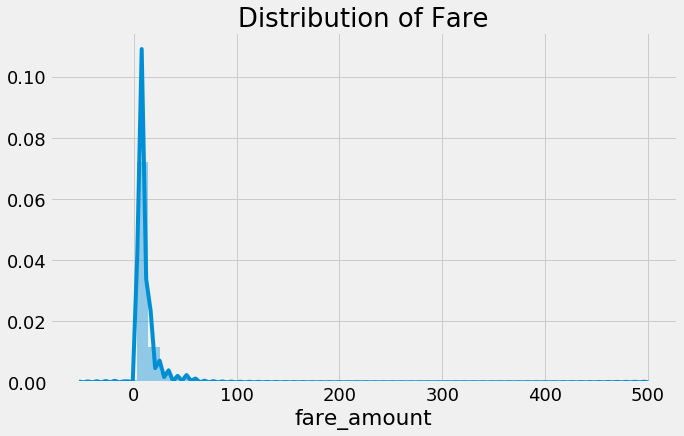

In [11]:
plt.figure(figsize = (10, 6))
sns.distplot(train['fare_amount']);
plt.title('Distribution of Fare');

In [12]:
train = train[train['fare_amount'].between(left = 2.5, right = 100)]

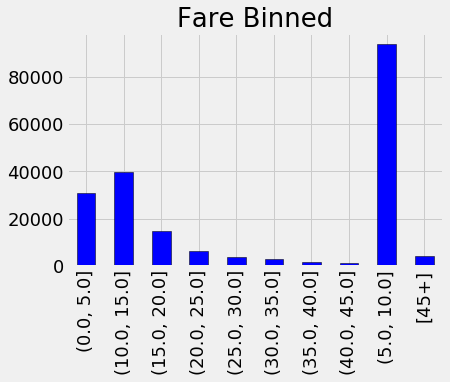

In [13]:
# Bin the fare and convert to string
train['fare-bin'] = pd.cut(train['fare_amount'], bins = list(range(0, 50, 5))).astype(str)

# Uppermost bin
train.loc[train['fare-bin'] == 'nan', 'fare-bin'] = '[45+]'

# Adjust bin so the sorting is correct
train.loc[train['fare-bin'] == '(5, 10]', 'fare-bin'] = '(05, 10]'

# Bar plot of value counts
train['fare-bin'].value_counts().sort_index().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Fare Binned');

In [14]:
def ecdf(x):
    """Empirical cumulative distribution function of a variable"""
    # Sort in ascending order
    x = np.sort(x)
    n = len(x)
    
    # Go from 1/n to 1
    y = np.arange(1, n + 1, 1) / n
    
    return x, y

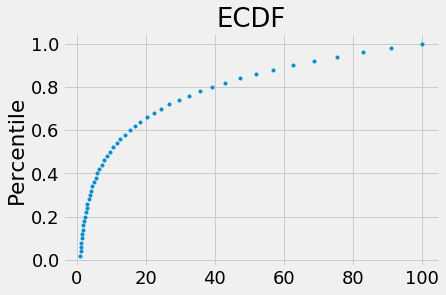

In [15]:
xs, ys = ecdf(np.logspace(0, 2))
plt.plot(xs, ys, '.');
plt.ylabel('Percentile'); plt.title('ECDF');


### ECDF empirical distribution function

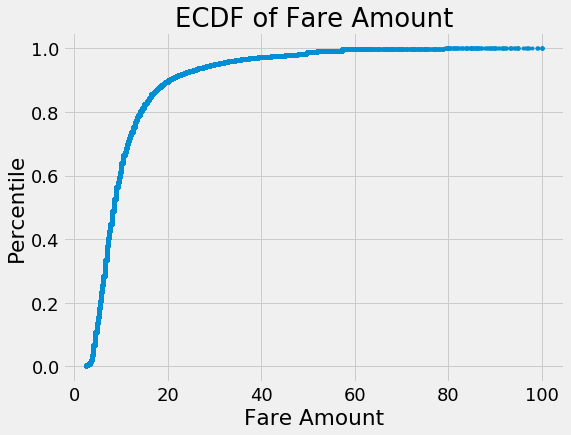

In [16]:
xs, ys = ecdf(train['fare_amount'])
plt.figure(figsize = (8, 6))
plt.plot(xs, ys, '.')
plt.ylabel('Percentile'); plt.title('ECDF of Fare Amount'); plt.xlabel('Fare Amount');

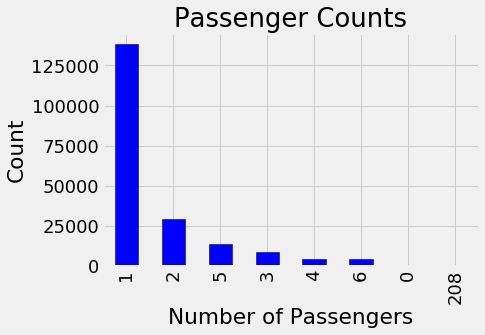

In [17]:
train['passenger_count'].value_counts().plot.bar(color = 'b', edgecolor = 'k');
plt.title('Passenger Counts'); plt.xlabel('Number of Passengers'); plt.ylabel('Count');

In [18]:
train= train.loc[train['passenger_count'] < 6]
train.head(10)


# removing the passengers whose count is less than 6

,ID,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin
0,24238194,7.500,2015-05-07 19:52:06+00:00,-74.000,40.738,-74.000,40.723,1,"(5.0, 10.0]"
1,27835199,7.700,2009-07-17 20:04:56+00:00,-73.994,40.728,-73.995,40.750,1,"(5.0, 10.0]"
2,44984355,12.900,2009-08-24 21:45:00+00:00,-74.005,40.741,-73.963,40.773,1,"(10.0, 15.0]"
3,25894730,5.300,2009-06-26 08:22:21+00:00,-73.976,40.791,-73.965,40.803,3,"(5.0, 10.0]"
4,17610152,16.000,2014-08-28 17:47:00+00:00,-73.925,40.744,-73.973,40.761,5,"(15.0, 20.0]"
5,44470845,4.900,2011-02-12 02:27:09+00:00,-73.969,40.756,-73.969,40.756,1,"(0.0, 5.0]"
6,48725865,24.500,2014-10-12 07:04:00+00:00,-73.961,40.694,-73.871,40.774,5,"(20.0, 25.0]"
7,44195482,2.500,2012-12-11 13:52:00+00:00,0.000,0.000,0.000,0.000,1,"(0.0, 5.0]"
8,15822268,9.700,2012-02-17 09:32:00+00:00,-73.975,40.746,-74.003,40.744,1,"(5.0, 10.0]"
9,50611056,12.500,2012-03-29 19:06:00+00:00,-74.001,40.742,-73.963,40.775,1,"(10.0, 15.0]"


In [19]:
print(f'Initial Observations: {train.shape[0]}')

Initial Observations: 195620


In [20]:
for col in ['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']:
    print(f'{col.capitalize():17}: 2.5% = {round(np.percentile(train[col], 2.5), 2):5} \t 97.5% = {round(np.percentile(train[col], 97.5), 2)}')

Pickup_latitude  : 2.5% = 40.64 	 97.5% = 40.8
Pickup_longitude : 2.5% = -74.01 	 97.5% = -73.78
Dropoff_latitude : 2.5% =   nan 	 97.5% = nan
Dropoff_longitude: 2.5% =   nan 	 97.5% = nan


C:\Users\SOURAV CH\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3826: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [21]:
# Remove latitude and longtiude outliers
train = train.loc[train['pickup_latitude'].between(40, 42)]
train= train.loc[train['pickup_longitude'].between(-75, -72)]
train = train.loc[train['dropoff_latitude'].between(40, 42)]
train = train.loc[train['dropoff_longitude'].between(-75, -72)]

print(f'New number of observations: {train.shape[0]}')

New number of observations: 191522


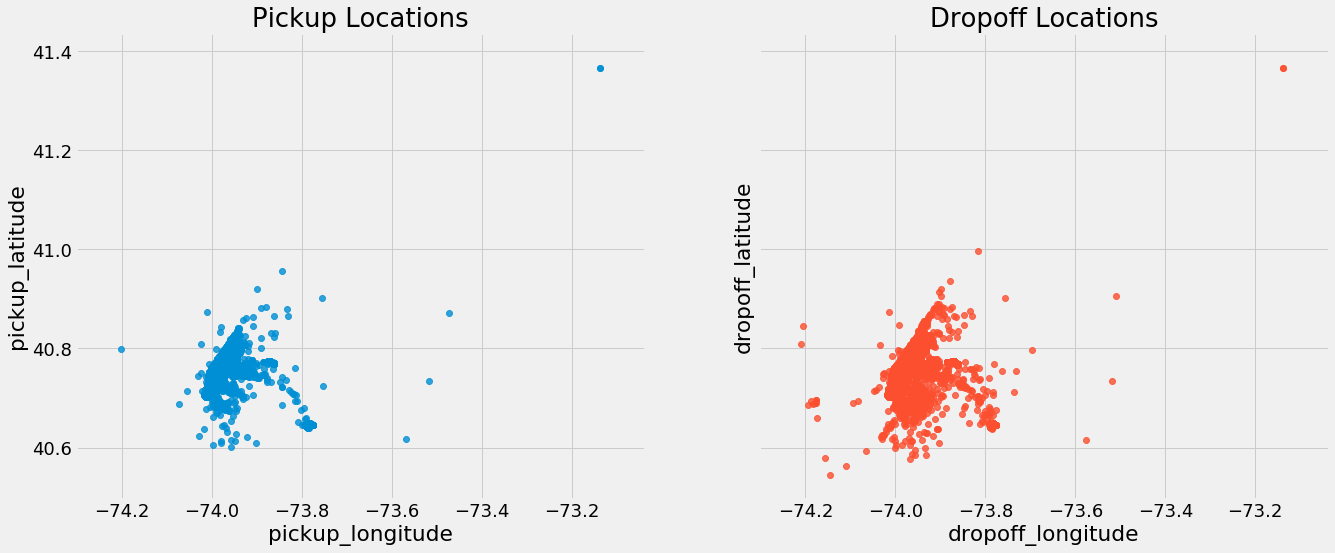

In [22]:
fig, axes = plt.subplots(1, 2, figsize = (20, 8), sharex=True, sharey=True)
axes = axes.flatten()
RSEED = 1001
# Plot Longitude (x) and Latitude (y)
sns.regplot('pickup_longitude', 'pickup_latitude', fit_reg = False, 
            data = train.sample(10000, random_state = RSEED), ax = axes[0]);
sns.regplot('dropoff_longitude', 'dropoff_latitude', fit_reg = False, 
            data = train.sample(10000, random_state = RSEED), ax = axes[1]);
axes[0].set_title('Pickup Locations')
axes[1].set_title('Dropoff Locations');

In [23]:
train['abs_lat_diff'] = (train['dropoff_latitude'] - train['pickup_latitude']).abs()
train['abs_lon_diff'] = (train['dropoff_longitude'] - train['pickup_longitude']).abs()

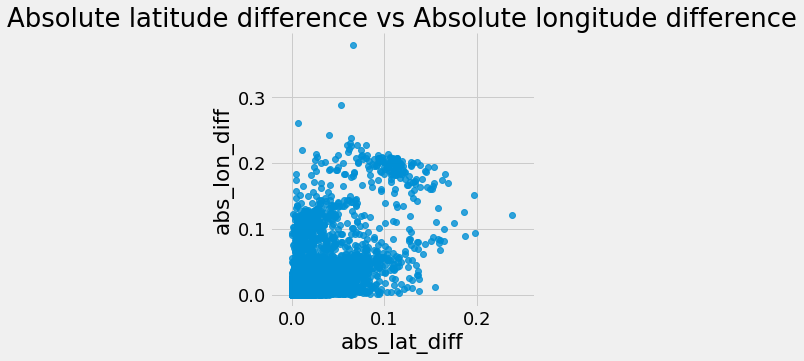

In [24]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', fit_reg = False,
           data = train.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

In [25]:
no_diff = train[(train['abs_lat_diff'] == 0) & (train['abs_lon_diff'] == 0)]
no_diff.shape

(1989, 11)

C:\Users\SOURAV CH\Anaconda3\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


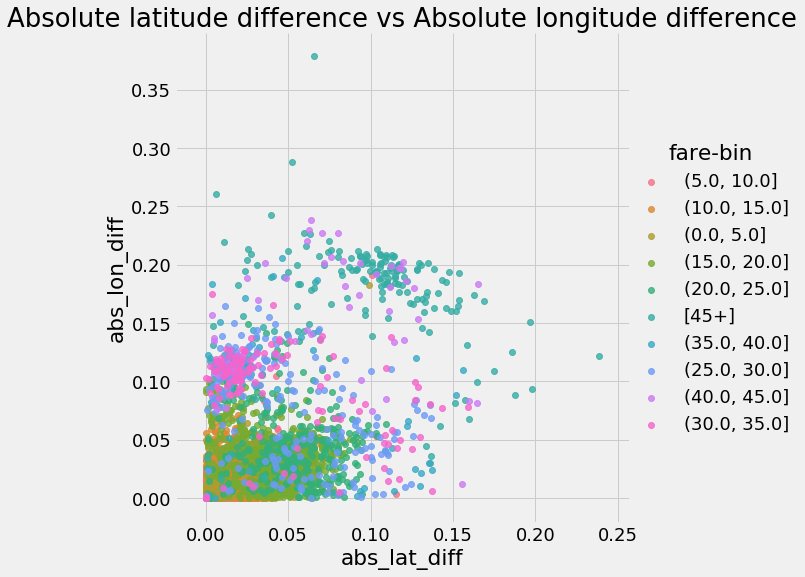

In [26]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8,
           fit_reg = False, data = train.sample(10000, random_state=RSEED));
plt.title('Absolute latitude difference vs Absolute longitude difference');

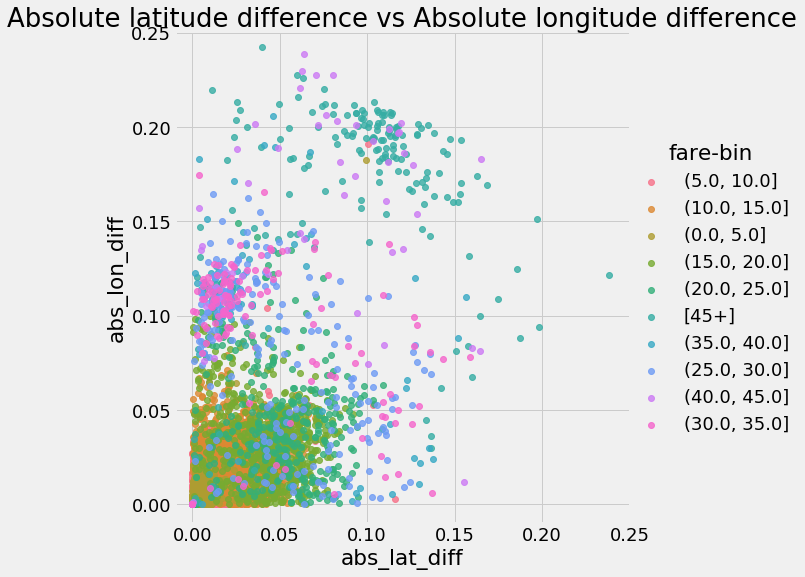

In [27]:
sns.lmplot('abs_lat_diff', 'abs_lon_diff', hue = 'fare-bin', size = 8,
           fit_reg = False, data = train.sample(10000, random_state=RSEED));

plt.xlim((-0.01, .25)); plt.ylim((-0.01, .25))
plt.title('Absolute latitude difference vs Absolute longitude difference');

from the above polt we can infer that rides with larger absolute values cost more , lets convert the didtance see the results

In [28]:
def equilidean_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)

In [29]:
equilidean_distance(0, 3, 0, 4, 1)

7.0

In [30]:
equilidean_distance(0, 3, 0, 4, 2)

5.0

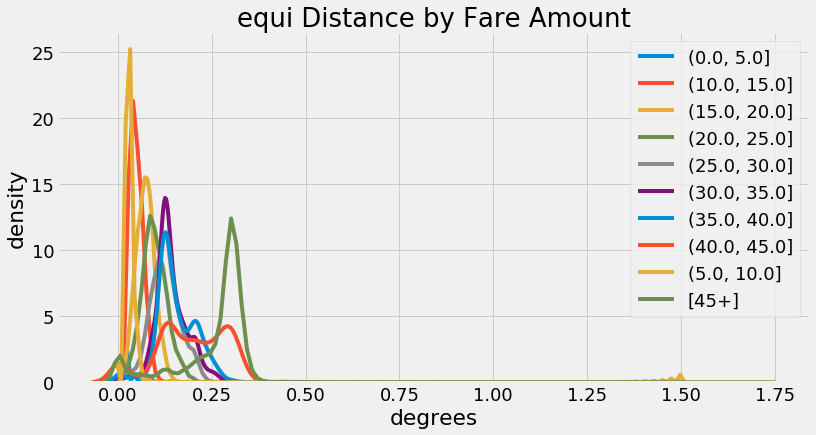

In [31]:
train['equi'] = equilidean_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 1)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in train.groupby('fare-bin'):
    sns.kdeplot(grouped['equi'], label = f'{f}');

plt.xlabel('degrees'); plt.ylabel('density')
plt.title('equi Distance by Fare Amount');

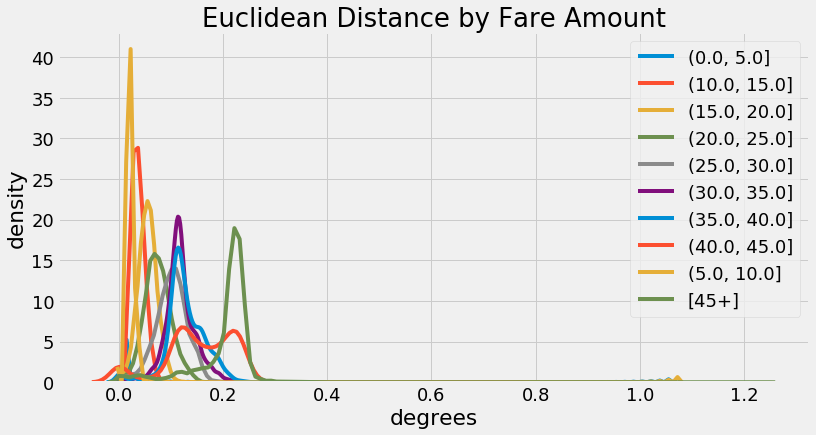

In [32]:
train['euclidean'] = equilidean_distance(train['pickup_longitude'], train['dropoff_longitude'],
                                       train['pickup_latitude'], train['dropoff_latitude'], 2)

# Calculate distribution by each fare bin
plt.figure(figsize = (12, 6))
for f, grouped in train.groupby('fare-bin'):
    sns.kdeplot(grouped['euclidean'], label = f'{f}');

plt.xlabel('degrees'); plt.ylabel('density')
plt.title('Euclidean Distance by Fare Amount');

In [33]:
train.groupby('fare-bin')['euclidean'].agg(['mean', 'count'])

,mean,count
fare-bin,,
"(0.0, 5.0]",0.009,29863
"(10.0, 15.0]",0.037,38068
"(15.0, 20.0]",0.055,14159
"(20.0, 25.0]",0.075,5999
"(25.0, 30.0]",0.101,3804
"(30.0, 35.0]",0.117,2663
"(35.0, 40.0]",0.127,1616
"(40.0, 45.0]",0.154,1339
"(5.0, 10.0]",0.020,90079


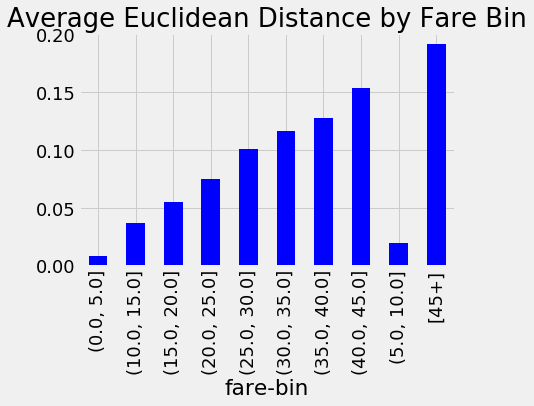

In [34]:
train.groupby('fare-bin')['euclidean'].mean().plot.bar(color = 'b');
plt.title('Average Euclidean Distance by Fare Bin');

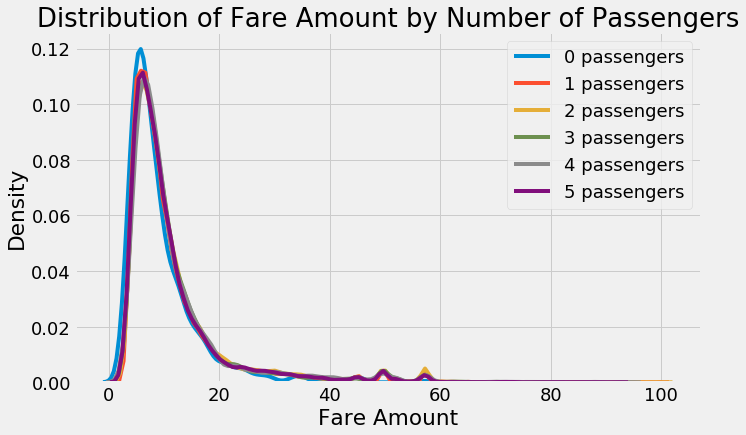

In [35]:
plt.figure(figsize = (10, 6))

for p, grouped in train.groupby('passenger_count'):
    sns.kdeplot(grouped['fare_amount'], label = f'{p} passengers');
    
plt.xlabel('Fare Amount'); plt.ylabel('Density')
plt.title('Distribution of Fare Amount by Number of Passengers');

In [36]:
train.groupby('passenger_count')['fare_amount'].agg(['mean', 'count'])

,mean,count
passenger_count,,
0,9.346,686
1,11.175,135419
2,11.732,28823
3,11.420,8695
4,11.604,4180
5,11.189,13719


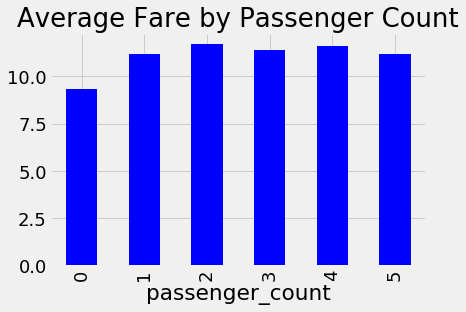

In [37]:
train.groupby('passenger_count')['fare_amount'].mean().plot.bar(color = 'b');
plt.title('Average Fare by Passenger Count');

In [38]:
test = pd.read_csv('sample_test.csv', parse_dates = ['pickup_datetime'])
test.rename(columns = {'Unnamed: 0':"ID"},inplace = True)
# Create absolute differences
test['abs_lat_diff'] = (test['dropoff_latitude'] - test['pickup_latitude']).abs()
test['abs_lon_diff'] = (test['dropoff_longitude'] - test['pickup_longitude']).abs()

# Save the id for submission
test_id = list(test.pop('key'))



test.describe()

,ID,Unnamed: 0.1,Unnamed: 0.1.1,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff
count,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000,50000.000
mean,24999.500,99940.045,27623566.223,-72.532,39.943,-72.577,39.946,1.683,0.098,0.213
std,14433.901,57788.038,16003606.138,10.306,5.915,12.442,5.906,1.307,1.756,7.732
min,0.000,1.000,1327.000,-80.735,-74.001,-1491.194,-74.001,0.000,0.000,0.000
25%,12499.750,49982.000,13724710.500,-73.992,40.735,-73.991,40.734,1.000,0.007,0.006
50%,24999.500,99638.000,27538430.500,-73.982,40.753,-73.980,40.753,1.000,0.014,0.012
75%,37499.250,150206.250,41536987.000,-73.967,40.767,-73.964,40.768,2.000,0.027,0.024
max,49999.000,199998.000,55422124.000,40.812,42.468,40.796,47.433,6.000,40.813,1417.230


In [39]:
test['euclidean'] = equilidean_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'], test['dropoff_latitude'], 1)

test['euclidean'] = equilidean_distance(test['pickup_longitude'], test['dropoff_longitude'],
                                       test['pickup_latitude'], test['dropoff_latitude'], 2)

In [40]:
train.head(10)

,ID,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,fare-bin,abs_lat_diff,abs_lon_diff,equi,euclidean
0,24238194,7.500,2015-05-07 19:52:06+00:00,-74.000,40.738,-74.000,40.723,1,"(5.0, 10.0]",0.015,0.000,0.015,0.015
1,27835199,7.700,2009-07-17 20:04:56+00:00,-73.994,40.728,-73.995,40.750,1,"(5.0, 10.0]",0.022,0.000,0.022,0.022
2,44984355,12.900,2009-08-24 21:45:00+00:00,-74.005,40.741,-73.963,40.773,1,"(10.0, 15.0]",0.032,0.042,0.074,0.053
3,25894730,5.300,2009-06-26 08:22:21+00:00,-73.976,40.791,-73.965,40.803,3,"(5.0, 10.0]",0.013,0.011,0.023,0.017
4,17610152,16.000,2014-08-28 17:47:00+00:00,-73.925,40.744,-73.973,40.761,5,"(15.0, 20.0]",0.017,0.048,0.065,0.051
5,44470845,4.900,2011-02-12 02:27:09+00:00,-73.969,40.756,-73.969,40.756,1,"(0.0, 5.0]",0.000,0.000,0.000,0.000
6,48725865,24.500,2014-10-12 07:04:00+00:00,-73.961,40.694,-73.871,40.774,5,"(20.0, 25.0]",0.080,0.090,0.171,0.121
8,15822268,9.700,2012-02-17 09:32:00+00:00,-73.975,40.746,-74.003,40.744,1,"(5.0, 10.0]",0.002,0.028,0.030,0.028
9,50611056,12.500,2012-03-29 19:06:00+00:00,-74.001,40.742,-73.963,40.775,1,"(10.0, 15.0]",0.033,0.038,0.071,0.050
10,2205147,6.500,2015-05-22 17:32:27+00:00,-73.974,40.747,-73.989,40.730,1,"(5.0, 10.0]",0.017,0.014,0.031,0.022


In [41]:
test.head(10)

,ID,Unnamed: 0.1,Unnamed: 0.1.1,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,euclidean
0,0,37338,31401407,2011-02-10 19:06:00+00:00,-73.952,40.791,-73.948,40.756,1,0.034,0.004,0.035
1,1,160901,33158465,2011-06-23 09:24:00+00:00,-73.951,40.772,-73.974,40.764,1,0.008,0.023,0.024
2,2,40428,10638355,2012-07-14 10:37:00+00:00,-73.996,40.748,-73.990,40.756,6,0.008,0.006,0.010
3,3,63353,3836845,2014-10-19 22:27:05+00:00,-73.998,40.717,-73.953,40.727,1,0.010,0.045,0.046
4,4,165491,27114503,2015-05-25 22:54:43+00:00,-73.953,40.714,-73.906,40.711,1,0.003,0.046,0.047
5,5,50041,6115780,2012-01-11 20:00:00+00:00,-73.961,40.775,-73.957,40.781,1,0.006,0.004,0.007
6,6,154977,39166285,2015-06-11 17:55:41+00:00,-73.980,40.784,-73.967,40.804,4,0.020,0.013,0.024
7,7,59490,39815901,2014-01-01 12:32:21+00:00,-73.992,40.750,-73.986,40.733,2,0.017,0.006,0.018
8,8,81335,1968343,2013-07-26 12:13:00+00:00,-73.972,40.760,-73.966,40.768,2,0.008,0.006,0.010
9,9,120124,35148266,2015-04-16 00:06:11+00:00,-73.973,40.764,-73.982,40.748,1,0.016,0.009,0.019


In [42]:
R = 6378

def sine_np(lon1, lat1, lon2, lat2):
   
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

In [43]:
train['sine'] =  sine_np(train['pickup_longitude'], train['pickup_latitude'],
                         train['dropoff_longitude'], train['dropoff_latitude']) 

test['sine'] = sine_np(test['pickup_longitude'], test['pickup_latitude'],
                         test['dropoff_longitude'], test['dropoff_latitude'])

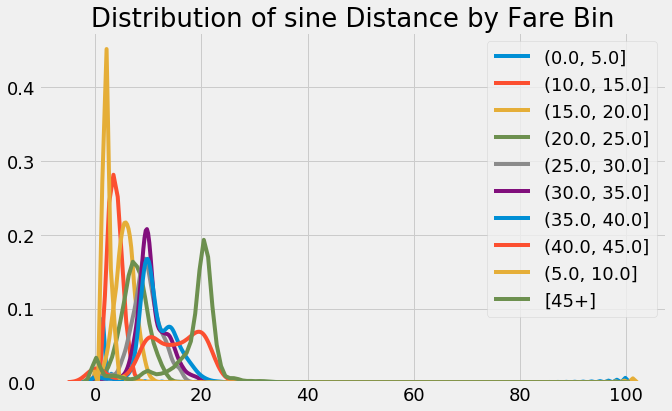

In [44]:
subset = train.sample(100000, random_state=RSEED)

plt.figure(figsize = (10, 6))

for f, grouped in subset.groupby('fare-bin'):
    sns.kdeplot(grouped['sine'], label = f'{f}');
    
plt.title('Distribution of sine Distance by Fare Bin');

In [45]:
train.groupby('fare-bin')['sine'].agg(['mean', 'count'])

,mean,count
fare-bin,,
"(0.0, 5.0]",0.894,29863
"(10.0, 15.0]",3.693,38068
"(15.0, 20.0]",5.583,14159
"(20.0, 25.0]",7.454,5999
"(25.0, 30.0]",9.513,3804
"(30.0, 35.0]",10.675,2663
"(35.0, 40.0]",11.587,1616
"(40.0, 45.0]",13.947,1339
"(5.0, 10.0]",1.937,90079


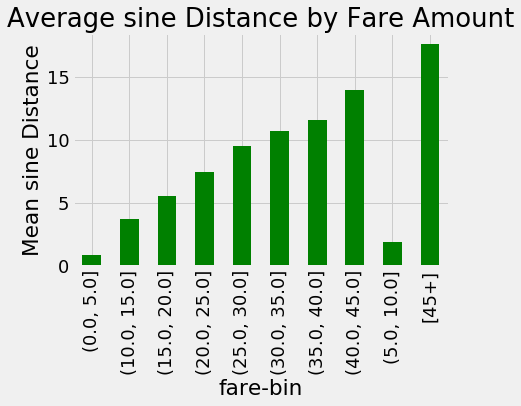

In [46]:
train.groupby('fare-bin')['sine'].mean().sort_index().plot.bar(color = 'g');
plt.title('Average sine Distance by Fare Amount');
plt.ylabel('Mean sine Distance');

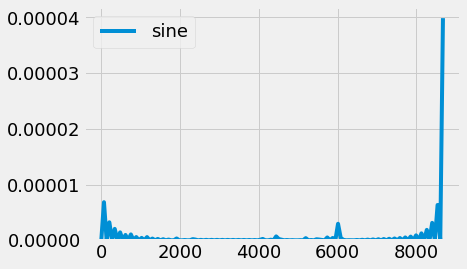

In [47]:
sns.kdeplot(test['sine']);

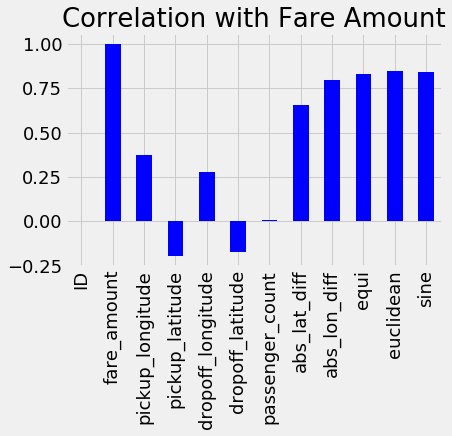

In [48]:
corrs = train.corr()
corrs['fare_amount'].plot.bar(color = 'b');
plt.title('Correlation with Fare Amount');

# as the distance increases abvious that the fare too increases so lets check for some more significance through model building

In [49]:
### Model 1 : linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr = LinearRegression()

In [50]:
X_train, X_valid, y_train, y_valid = train_test_split(train, np.array(train['fare_amount']), 
                                                      stratify = train['fare-bin'],
                                                      random_state = RSEED, test_size = 1_000_00)

In [51]:
lr.fit(X_train[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

print('Intercept', round(lr.intercept_, 4))
print('abs_lat_diff coef: ', round(lr.coef_[0], 4), 
      '\tabs_lon_diff coef:', round(lr.coef_[1], 4),
      '\tpassenger_count coef:', round(lr.coef_[2], 4))

Intercept 5.0613
abs_lat_diff coef:  114.4018 	abs_lon_diff coef: 164.2123 	passenger_count coef: 0.0227


In [52]:
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings('ignore', category = RuntimeWarning)

def metrics(train_pred, valid_pred, y_train, y_valid):
    """Calculate metrics:
       Root mean squared error and mean absolute percentage error"""
    
    # Root mean squared error
    train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
    valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_pred))
    
    # Calculate absolute percentage error
    train_ape = abs((y_train - train_pred) / y_train)
    valid_ape = abs((y_valid - valid_pred) / y_valid)
    
    # Account for y values of 0
    train_ape[train_ape == np.inf] = 0
    train_ape[train_ape == -np.inf] = 0
    valid_ape[valid_ape == np.inf] = 0
    valid_ape[valid_ape == -np.inf] = 0
    
    train_mape = 100 * np.mean(train_ape)
    valid_mape = 100 * np.mean(valid_ape)
    
    return train_rmse, valid_rmse, train_mape, valid_mape

def evaluate(model, features, X_train, X_valid, y_train, y_valid):
    """Mean absolute percentage error"""
    
    # Make predictions
    train_pred = model.predict(X_train[features])
    valid_pred = model.predict(X_valid[features])
    
    # Get metrics
    train_rmse, valid_rmse, train_mape, valid_mape = metrics(train_pred, valid_pred,
                                                             y_train, y_valid)
    
    print(f'Training:   rmse = {round(train_rmse, 2)} \t mape = {round(train_mape, 2)}')
    print(f'Validation: rmse = {round(valid_rmse, 2)} \t mape = {round(valid_mape, 2)}')

In [53]:
evaluate(lr, ['abs_lat_diff', 'abs_lon_diff', 'passenger_count'], 
        X_train, X_valid, y_train, y_valid)




Training:   rmse = 5.32 	 mape = 27.99
Validation: rmse = 5.07 	 mape = 27.86


In [54]:
train_mean = y_train.mean()

# Create list of the same prediction for every observation
train_preds = [train_mean for _ in range(len(y_train))]
valid_preds = [train_mean for _ in range(len(y_valid))]

tr, vr, tm, vm = metrics(train_preds, valid_preds, y_train, y_valid)

print(f'Baseline Training:   rmse = {round(tr, 2)} \t mape = {round(tm, 2)}')
print(f'Baseline Validation: rmse = {round(vr, 2)} \t mape = {round(vm, 2)}')

Baseline Training:   rmse = 9.36 	 mape = 64.76
Baseline Validation: rmse = 9.41 	 mape = 64.86


In [55]:
preds = lr.predict(test[['abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_lr_simple.csv', index = False)

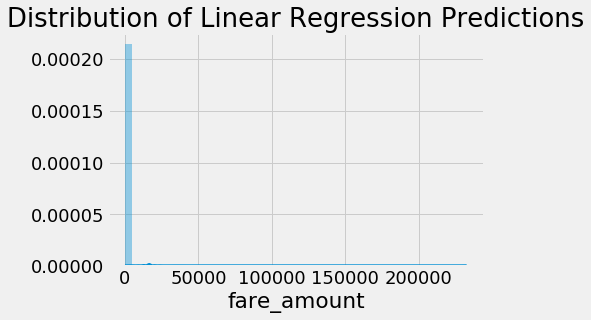

In [56]:
sns.distplot(sub['fare_amount'])
plt.title('Distribution of Linear Regression Predictions');

In [57]:
test.loc[sub[sub['fare_amount'] > 100].index]

,ID,Unnamed: 0.1,Unnamed: 0.1.1,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,abs_lat_diff,abs_lon_diff,euclidean,sine
447,447,165933,29532836,2014-08-25 20:49:44+00:00,-73.986,40.769,0.000,0.000,1,40.769,73.986,84.475,8676.053
579,579,104566,54110893,2012-07-19 18:54:00+00:00,-3.991,40.756,-73.962,40.778,2,0.022,69.971,69.971,5730.124
1193,1193,151708,26795332,2012-07-18 19:22:00+00:00,-0.117,40.762,-73.990,40.752,2,0.010,73.873,73.873,6028.402
1576,1576,78088,40092472,2015-05-02 21:25:43+00:00,0.000,0.000,-73.992,40.762,2,40.762,73.992,84.477,8676.455
1928,1928,34661,3660422,2014-11-09 00:47:33+00:00,-73.995,40.717,0.000,0.000,1,40.717,73.995,84.458,8675.802
...,...,...,...,...,...,...,...,...,...,...,...,...,...
46773,46773,195028,22581644,2014-10-24 15:48:03+00:00,0.000,0.000,-73.967,40.770,1,40.770,73.967,84.459,8674.548
47194,47194,176930,34134753,2013-12-03 18:56:25+00:00,0.000,0.000,-73.975,40.761,1,40.761,73.975,84.462,8675.040
48261,48261,87201,21671361,2011-05-01 15:26:28+00:00,-75.415,40.769,-73.989,40.759,1,0.010,1.426,1.426,120.227
49580,49580,122418,45947246,2010-03-15 19:21:36+00:00,0.000,0.000,-73.968,40.768,1,40.768,73.968,84.459,8674.550


In [58]:
sub[sub['fare_amount'] > 100]

,key,fare_amount
447,2014-08-25 20:49:44.0000002,16818.480
579,2012-07-19 18:54:00.00000025,11497.701
1193,2012-07-18 19:22:00.000000196,12137.199
1576,2015-05-02 21:25:43.0000004,16818.809
1928,2014-11-09 00:47:33.0000001,16814.176
...,...,...
46773,2014-10-24 15:48:03.0000001,16815.570
47194,2013-12-03 18:56:25.0000001,16815.861
48261,2011-05-01 15:26:28.0000005,240.423
49580,2010-03-15 19:21:36.0000001,16815.459


In [59]:
simple_over_100 = list(sub[sub['fare_amount'] > 100].index)
sub['fare_amount'].describe()

count    50000.000
mean        51.254
std       1361.348
min          5.061
25%          7.290
50%          8.907
75%         11.931
max     232735.215
Name: fare_amount, dtype: float64

# using more features

In [60]:
lr2 = LinearRegression()
lr2.fit(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

evaluate(lr2, ['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count'], 
         X_train, X_valid, y_train, y_valid)

Training:   rmse = 4.96 	 mape = 24.22
Validation: rmse = 4.79 	 mape = 24.16


In [61]:
print(lr.intercept_)
print(lr.coef_)

5.061287861369121
[1.14401782e+02 1.64212254e+02 2.26815639e-02]


In [62]:
preds = lr2.predict(test[["sine",'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_lr2_simple.csv', index = False)

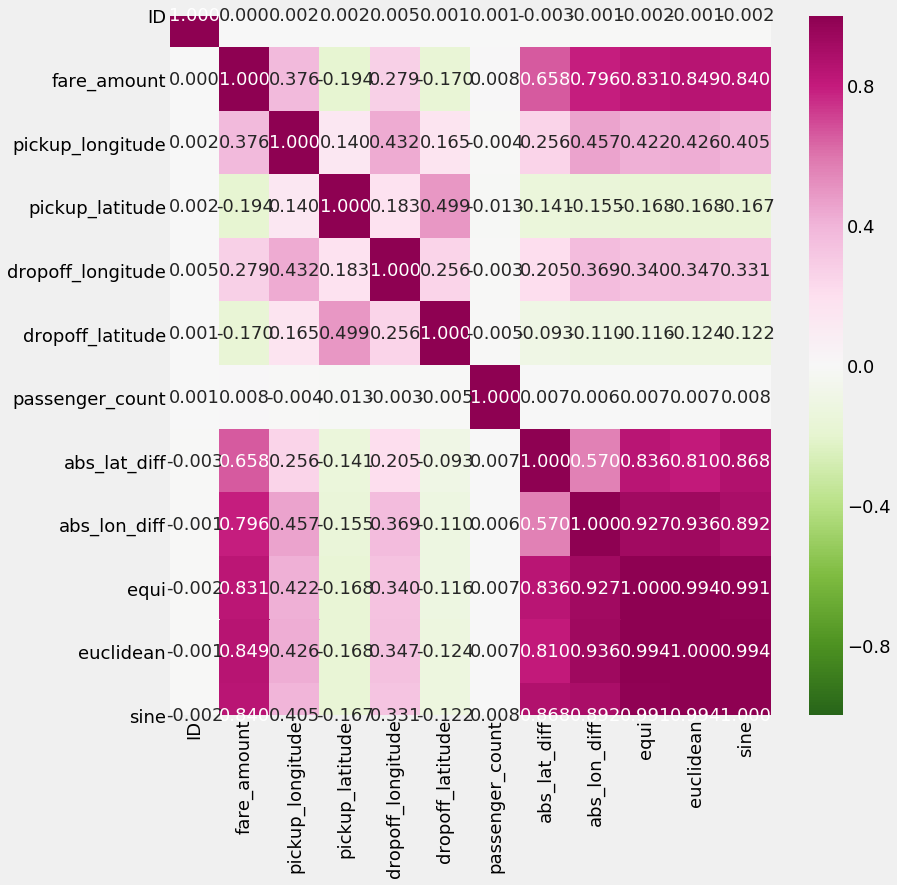

In [63]:
corrs = train.corr()

plt.figure(figsize = (12, 12))
sns.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

# Random Forest:


In [64]:
from sklearn.ensemble import RandomForestRegressor

# Create the random forest
random_forest = RandomForestRegressor(n_estimators = 20, max_depth = 20, 
                                      max_features = None, oob_score = True, 
                                      bootstrap = True, verbose = 1, n_jobs = -1)

# Train on data
random_forest.fit(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.1s finished
C:\Users\SOURAV CH\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\_forest.py:815: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features=None, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=-1, oob_score=True,
                      random_state=None, verbose=1, warm_start=False)

In [65]:
evaluate(random_forest, ['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count'],
         X_train, X_valid, y_train, y_valid)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Training:   rmse = 2.47 	 mape = 14.9
Validation: rmse = 4.35 	 mape = 23.09


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


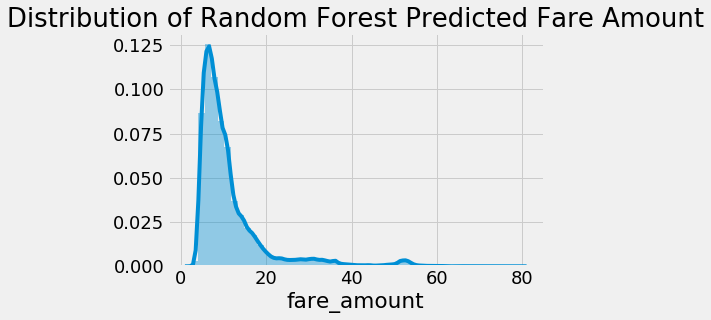

In [66]:
preds = random_forest.predict(test[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_rf_simple.csv', index = False)

sns.distplot(sub['fare_amount'])
plt.title('Distribution of Random Forest Predicted Fare Amount');

In [67]:
sub.loc[simple_over_100]

,key,fare_amount
447,2014-08-25 20:49:44.0000002,36.073
579,2012-07-19 18:54:00.00000025,60.348
1193,2012-07-18 19:22:00.000000196,60.535
1576,2015-05-02 21:25:43.0000004,36.073
1928,2014-11-09 00:47:33.0000001,36.073
...,...,...
46773,2014-10-24 15:48:03.0000001,36.073
47194,2013-12-03 18:56:25.0000001,36.073
48261,2011-05-01 15:26:28.0000005,60.773
49580,2010-03-15 19:21:36.0000001,36.073


In [68]:
lr_tpred = lr2.predict(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])
rf_tpred = random_forest.predict(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

lr_pred = lr2.predict(X_valid[['sine','abs_lat_diff', 'abs_lon_diff', 'passenger_count']])
rf_pred = random_forest.predict(X_valid[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

# Average predictions
train_pred = (lr_tpred + rf_tpred) / 2
valid_pred = (lr_pred + rf_pred) / 2

tr, vr, tm, vm = metrics(train_pred, valid_pred, y_train, y_valid)

print(f'Combined Training:   rmse = {round(tr, 2)} \t mape = {round(tm, 2)}')
print(f'Combined Validation: rmse = {round(vr, 2)} \t mape = {round(vm, 2)}')

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.


Combined Training:   rmse = 3.48 	 mape = 18.93
Combined Validation: rmse = 4.34 	 mape = 22.87


[Parallel(n_jobs=8)]: Done  20 out of  20 | elapsed:    0.0s finished


In [69]:
def model_rf(X_train, X_valid, y_train, y_valid, test, features,
             model = RandomForestRegressor(n_estimators = 20, max_depth = 20,
                                           n_jobs = -1),
             return_model = False):
    """Train and evaluate the random forest using the given set of features."""
    
    # Train
    model.fit(X_train[features], y_train)
    
    # Validation
    evaluate(model, features, X_train, X_valid, y_train, y_valid)
    
    # Make predictions on test and generate submission dataframe
    preds = model.predict(test[features])
    sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
    
    # Extract feature importances
    feature_importances = pd.DataFrame({'feature': features,
                                        'importance': model.feature_importances_}).\
                           sort_values('importance', ascending = False).set_index('feature')
    
    if return_model:
        return sub, feature_importances, model
    
    return sub, feature_importances

In [70]:
train.columns

Index(['ID', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'fare-bin', 'abs_lat_diff', 'abs_lon_diff', 'equi',
       'euclidean', 'sine'],
      dtype='object')

In [71]:
sub, fi = model_rf(X_train, X_valid, y_train, y_valid, test, 
                   features = ['abs_lat_diff', 'abs_lon_diff', 'sine', 'passenger_count',
                               'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude'])

Training:   rmse = 2.05 	 mape = 13.8
Validation: rmse = 3.95 	 mape = 21.58


In [72]:

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_rflr2_simple.csv', index = False)

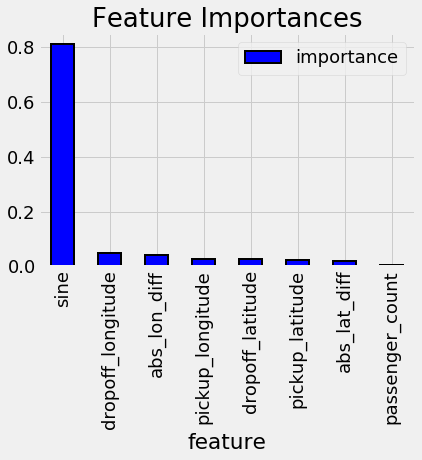

In [73]:
fi.plot.bar(color = 'b', edgecolor = 'k', linewidth = 2);
plt.title('Feature Importances');

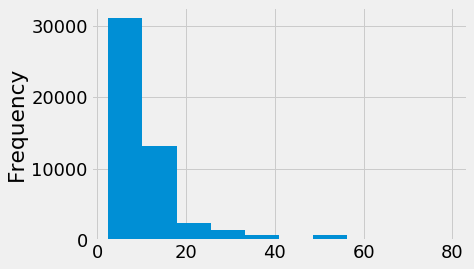

In [74]:
sub.to_csv('sub_rf_8_features.csv', index = False)
sub['fare_amount'].plot.hist();

In [75]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn. tree import DecisionTreeRegressor

model_ada = AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth = 10),n_estimators = 50,learning_rate = 0.1)

In [ ]:
model_ada.fit(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

In [ ]:
evaluate(model_ada, ['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count'],
         X_train, X_valid, y_train, y_valid)

In [ ]:
preds = model_ada.predict(test[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_ada1_simple.csv', index = False)

sns.distplot(sub['fare_amount'])
plt.title('Distribution of adaboost Predicted Fare Amount');

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_graad =GradientBoostingRegressor(n_estimators = 500,learning_rate = 0.1)

In [ ]:
model_graad.fit(X_train[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']], y_train)

In [ ]:
evaluate(model_graad, ['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count'],
         X_train, X_valid, y_train, y_valid)

In [ ]:
preds = model_graad.predict(test[['sine', 'abs_lat_diff', 'abs_lon_diff', 'passenger_count']])

sub = pd.DataFrame({'key': test_id, 'fare_amount': preds})
sub.to_csv('sub_gr1_simple.csv', index = False)

sns.distplot(sub['fare_amount'])
plt.title('Distribution of Gradient Predicted Fare Amount');

In [ ]:

# code referred from kaggle:

import re

def extract_dateinfo(df, date_col, drop=True, time=False, 
                     start_ref = pd.datetime(1900, 1, 1),
                     extra_attr = False):
    """
    Extract Date (and time) Information from a DataFrame
    Adapted from: https://github.com/fastai/fastai/blob/master/fastai/structured.py
    """
    df = df.copy()
    
    # Extract the field
    fld = df[date_col]
    
    # Check the time
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    # Convert to datetime if not already
    if not np.issubdtype(fld_dtype, np.datetime64):
        df[date_col] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    

    # Prefix for new columns
    pre = re.sub('[Dd]ate', '', date_col)
    pre = re.sub('[Tt]ime', '', pre)
    
    # Basic attributes
    attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Days_in_month', 'is_leap_year']
    
    # Additional attributes
    if extra_attr:
        attr = attr + ['Is_month_end', 'Is_month_start', 'Is_quarter_end', 
                       'Is_quarter_start', 'Is_year_end', 'Is_year_start']
    
    # If time is specified, extract time information
    if time: 
        attr = attr + ['Hour', 'Minute', 'Second']
        
    # Iterate through each attribute
    for n in attr: 
        df[pre + n] = getattr(fld.dt, n.lower())
        
    # Calculate days in year
    df[pre + 'Days_in_year'] = df[pre + 'is_leap_year'] + 365
        
    if time:
        # Add fractional time of day (0 - 1) units of day
        df[pre + 'frac_day'] = ((df[pre + 'Hour']) + (df[pre + 'Minute'] / 60) + (df[pre + 'Second'] / 60 / 60)) / 24
        
        # Add fractional time of week (0 - 1) units of week
        df[pre + 'frac_week'] = (df[pre + 'Dayofweek'] + df[pre + 'frac_day']) / 7
    
        # Add fractional time of month (0 - 1) units of month
        df[pre + 'frac_month'] = (df[pre + 'Day'] + (df[pre + 'frac_day'])) / (df[pre + 'Days_in_month'] +  1)
        
        # Add fractional time of year (0 - 1) units of year
        df[pre + 'frac_year'] = (df[pre + 'Dayofyear'] + df[pre + 'frac_day']) / (df[pre + 'Days_in_year'] + 1)
        
    # Add seconds since start of reference
    df[pre + 'Elapsed'] = (fld - start_ref).dt.total_seconds()
    
    if drop: 
        df = df.drop(date_col, axis=1)
        
    return df

In [ ]:
print(train['pickup_datetime'].min())
print(test['pickup_datetime'].min())

In [ ]:
test = extract_dateinfo(test, 'pickup_datetime', drop = False, 
                         time = True, start_ref = train['pickup_datetime'].min())
test.head()

In [ ]:
data = extract_dateinfo(train, 'pickup_datetime', drop = False, 
                         time = True, start_ref = train['pickup_datetime'].min())
test.describe()

In [ ]:
test

In [ ]:

sns.lmplot('pickup_Elapsed', 'fare_amount', hue = 'pickup_Year',  size = 8,
           scatter_kws= {'alpha': 0.05}, markers = '.', fit_reg = False,
           data = data.sample(100000, random_state=RSEED));
plt.title('Fare Amount versus Time Since Start of Records');

In [ ]:
plt.figure(figsize = (8, 8))
for h, grouped in data.groupby('pickup_Hour'):
    sns.kdeplot(grouped['fare_amount'], label = f'{h} hour');
plt.title('Fare Amount by Hour of Day');

In [ ]:
plt.figure(figsize = (10, 8))
for d, grouped in data.groupby('pickup_Dayofweek'):
    sns.kdeplot(grouped['fare_amount'], label = f'{d}')
plt.title('Fare Amount by Day of Week');

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (20, 20))
axes = axes.flatten()

# Plot each of the fractional times
for i, d in enumerate(['day', 'week', 'month', 'year']):
    ax = axes[i]
    sns.regplot(f'pickup_frac_{d}', 'fare_amount', 
                data = data.sample(100000, random_state = RSEED), 
                fit_reg = False, scatter_kws = {'alpha': 0.05}, marker = '.', ax = ax,
                color = 'r')
    
    ax.set_title(f'Fare Amount vs pickup_frac_{d}')

In [ ]:
fare_counts = data.groupby('fare_amount')['sine'].agg(['count', pd.Series.nunique]).sort_values('count', ascending = False)
fare_counts.head()

In [ ]:
corrs = data.corr()
corrs['fare_amount'].plot.bar(color = 'b', figsize = (10, 6));
plt.title('Correlation with Fare Amount');

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(data, np.array(data['fare_amount']), 
                                                      stratify = data['fare-bin'],
                                                      random_state = RSEED, test_size = 1_000_00)

In [ ]:
time_features = ['pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 'pickup_Elapsed']

features = ['abs_lat_diff', 'abs_lon_diff', 'sine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude'] + time_features

In [ ]:
sub, fi = model_rf(X_train, X_valid, y_train, y_valid, test, 
                   features = features)


In [ ]:
lr3 = LinearRegression()

# Fit and evaluate
lr3.fit(X_train[features], y_train)
evaluate(lr3, features, X_train, X_valid, y_train, y_valid)

In [ ]:
plt.figure(figsize = (10, 8))
fi['importance'].plot.bar(color = 'g', edgecolor = 'k');
plt.ylabel('Importance'); plt.title('Feature Importances');

In [ ]:
sub.to_csv('sub_rf3time.csv', index = False)

In [ ]:


features = list(data.columns)

for f in features:
    features.remove(f)
    
len(features)

In [ ]:
features = []

for f in data.columns:
    features.remove(f)
    
len(features)

In [ ]:
features

In [ ]:
sub, fi, random_forest = model_rf(X_train, X_valid, y_train, y_valid, test, 
                                  features = features, return_model = True)

In [ ]:
valid_preds = random_forest.predict(X_valid[features])

plt.figure(figsize = (10, 6))
sns.kdeplot(y_valid, label = 'Actual')
sns.kdeplot(valid_preds, label = 'Predicted')
plt.legend(prop = {'size': 30})
plt.title("Distribution of Validation Fares");

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 100).astype(int),
    'max_depth': [None] + list(np.linspace(5, 30).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestRegressor(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'neg_mean_absolute_error', cv = 3, 
                        n_iter = 100, verbose = 1, random_state=RSEED)

In [ ]:
tune_data = data.sample(100_000, random_state = RSEED)

# Select features
time_features = ['pickup_frac_day', 'pickup_frac_week', 'pickup_frac_year', 'pickup_Elapsed']

features = ['abs_lat_diff', 'abs_lon_diff', 'sine', 'passenger_count',
            'pickup_latitude', 'pickup_longitude', 
            'dropoff_latitude', 'dropoff_longitude'] + time_features

rs.fit(tune_data[features], np.array(tune_data['fare_amount']))

In [ ]:
model_new = rs.best_estimator_
print(f'The best parameters were {rs.best_params_} with a negative mae of {rs.best_score_}')

In [ ]:
pred = np.array(model_new.predict(test[features])).reshape((-1))
sub = pd.DataFrame({'key': test_id, 'fare_amount': pred})
sub.to_csv('sub_rf_new.csv', index = False)
sub['fare_amount'].plot.hist();
plt.title('Predicted Test Fare Distribution');